## Mobile Price Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('mobile_price_data.csv')

In [3]:
df

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,128 GB,4 GB,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75.4 mm,164.4 mm,9 mm,199 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,"OPPO A83 (Black, 32 GB)","₹13,490",Black,Dual Sim,14.48 cm (5.7 inch),1440 x 720 Pixels,Android Nougat 7.1,Octa Core,2.5 GHz,32 GB,3 GB,13MP Rear Camera,8MP Front Camera,"3G, 4G VOLTE, 2G",Yes,3180 mAh,73.1 mm,150.5 mm,7.7 mm,143 g
455,"OPPO A83 (Red, 16 GB)","₹9,490",Red,Dual Sim,14.48 cm (5.7 inch),1440 x 720 Pixels,Android Nougat 7.1,Octa Core,2.5 GHz,16 GB,2 GB,13MP Rear Camera,8MP Front Camera,"3G, 4G VOLTE, 4G, 2G",Yes,3180 mAh,73.1 mm,150.5 mm,7.7 mm,143 g
456,"OPPO F7 (Red, 64 GB)","₹22,990",Red,Dual Sim,15.82 cm (6.23 inch),2280 x 1080 Pixels,Android Oreo 8.1.0,Octa Core,2 GHz,64 GB,4 GB,16MP Rear Camera,25MP Front Camera,"3G, 4G, 2G",Yes,3400 mAh,75.3 mm,156 mm,7.8 mm,158 g
457,"OPPO F11 (Marble Green, 128 GB)","₹13,990",Marble Green,Dual Sim,16.59 cm (6.53 inch),1080 x 2340 pixels,Android Pie 9.0,Octa Core,2.1 GHz,128 GB,4 GB,48MP + 5MP,16MP Front Camera,"3G, 4G VOLTE, 4G, 2G",Yes,4020 mAh,76.1 mm,162 mm,8.3 mm,188 g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mobile_name    459 non-null    object
 1   mobile_price   459 non-null    object
 2   mobile_color   459 non-null    object
 3   dual_sim       459 non-null    object
 4   disp_size      459 non-null    object
 5   resolution     459 non-null    object
 6   os             459 non-null    object
 7   num_cores      459 non-null    object
 8   mp_speed       459 non-null    object
 9   int_memory     459 non-null    object
 10  ram            459 non-null    object
 11  p_cam          459 non-null    object
 12  f_cam          459 non-null    object
 13  network        459 non-null    object
 14  bluetooth      459 non-null    object
 15  battery_power  459 non-null    object
 16  mob_width      459 non-null    object
 17  mob_height     459 non-null    object
 18  mob_depth      459 non-null   

In [5]:
for col in df.columns:
    print(col, df[col].unique())
    print('\n')

mobile_name ['Realme Narzo 10A (So White, 32 GB)' 'Realme Narzo 10A (So Blue, 32 GB)'
 'Realme Narzo 10A (So Blue, 64 GB)' 'Realme Narzo 10A (So White, 64 GB)'
 'Realme Narzo 10 (That Green, 128 GB)'
 'Realme Narzo 10 (That White, 128 GB)'
 'Realme 5 Pro (Crystal Green, 64 GB)'
 'Realme 5 Pro (Crystal Green, 128 GB)'
 'Realme 5 Pro (Sparkling Blue, 128 GB)'
 'Realme 5 Pro (Sparkling Blue, 64 GB)'
 'Realme X2 Pro (Lunar White, 256 GB)'
 'Realme X2 Pro (Neptune Blue, 256 GB)'
 'Realme X2 Pro (Neptune Blue, 128 GB)'
 'Realme X2 Pro (Lunar White, 128 GB)' 'Realme 2 Pro (Black Sea, 128 GB)'
 'Realme XT (Pearl Blue, 64 GB)' 'Realme XT (Pearl White, 64 GB)'
 'Realme X50 Pro (Rust Red, 128 GB)' 'Realme X50 Pro (Moss Green, 128 GB)'
 'Realme X50 Pro (Moss Green, 256 GB)' 'Realme C3 (Frozen Blue, 32 GB)'
 'Realme 6 (Comet White, 128 GB)'
 'Realme 6 Pro (Lightning Orange, 128 GB)'
 'Realme 6 Pro (Lightning Blue, 128 GB)'
 'Realme C2 (Diamond Black, 32 GB)' 'Realme C2 (Diamond Blue, 32 GB)'
 'Real

In [6]:
df._get_numeric_data()

""
0
1
2
3
4
...
454
455
456
457


In [7]:
initial_df = df

In [8]:
status = dict(zip(df.columns,list([0]*len(df.columns))))

In [9]:
status

{'mobile_name': 0,
 'mobile_price': 0,
 'mobile_color': 0,
 'dual_sim': 0,
 'disp_size': 0,
 'resolution': 0,
 'os': 0,
 'num_cores': 0,
 'mp_speed': 0,
 'int_memory': 0,
 'ram': 0,
 'p_cam': 0,
 'f_cam': 0,
 'network': 0,
 'bluetooth': 0,
 'battery_power': 0,
 'mob_width': 0,
 'mob_height': 0,
 'mob_depth': 0,
 'mob_weight': 0}

In [10]:
def print_processed_status(df):
    for col in df.columns:
        print(col, status[col])

In [11]:
print_processed_status(df)

mobile_name 0
mobile_price 0
mobile_color 0
dual_sim 0
disp_size 0
resolution 0
os 0
num_cores 0
mp_speed 0
int_memory 0
ram 0
p_cam 0
f_cam 0
network 0
bluetooth 0
battery_power 0
mob_width 0
mob_height 0
mob_depth 0
mob_weight 0


In [12]:
def numericize(df,col):
    return pd.to_numeric(df[col].str.replace('[a-zA-Z]','',regex=True))

In [13]:
df.head()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,128 GB,4 GB,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75.4 mm,164.4 mm,9 mm,199 g


In [14]:
df['mp_speed'] = numericize(df,'mp_speed')
df['mp_speed'].unique()
status['mp_speed'] = 1

In [15]:
df['int_memory'] = numericize(df,'int_memory')
df['int_memory'].unique()
status['int_memory'] = 1

In [16]:
df['ram'] = numericize(df,'ram')
df['ram'].unique()
status['ram'] = 1

In [17]:
df['battery_power'] = numericize(df,'battery_power')
df['battery_power'].unique()
status['battery_power'] = 1

In [18]:
df['mob_width'] = numericize(df,'mob_width')
df['mob_width'].unique()
status['mob_width'] = 1

In [19]:
df['mob_height'] = numericize(df,'mob_height')
df['mob_height'].unique()
status['mob_height'] = 1

In [20]:
df['mob_depth'] = numericize(df,'mob_depth')
df['mob_depth'].unique()
status['mob_depth'] = 1

In [21]:
df['mob_weight'] = numericize(df,'mob_weight')
df['mob_weight'].unique()
status['mob_weight'] = 1

In [22]:
df._get_numeric_data()

,mp_speed,int_memory,ram,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,2.0,32,3,5000,75.0,164.4,8.95,195.0
1,2.0,32,3,5000,75.0,164.4,8.95,195.0
2,2.0,64,4,5000,75.0,164.4,8.95,195.0
3,2.0,64,4,5000,75.0,164.4,8.95,195.0
4,2.0,128,4,5000,75.4,164.4,9.00,199.0
...,...,...,...,...,...,...,...,...
454,2.5,32,3,3180,73.1,150.5,7.70,143.0
455,2.5,16,2,3180,73.1,150.5,7.70,143.0
456,2.0,64,4,3400,75.3,156.0,7.80,158.0
457,2.1,128,4,4020,76.1,162.0,8.30,188.0


In [23]:
df.head()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.4,8.95,195.0
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.4,8.95,195.0
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.4,8.95,195.0
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.4,8.95,195.0
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,128,4,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.4,164.4,9.00,199.0


In [24]:
def edit_numericize(df,col,strs_to_remove):
    processed = df[col]
    for string in strs_to_remove:
        processed = processed.str.replace(string,'',regex=False)
    return pd.to_numeric(processed)

In [25]:
df['mobile_price'] = edit_numericize(df,'mobile_price',['₹',','])
df['mobile_price'].unique()
status['mobile_price'] = 1

In [26]:
import seaborn as sns
import numpy as np

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(),mask=mask, annot=True)

ValueError: could not convert string to float: 'Realme Narzo 10A (So White, 32 GB)'

In [27]:
def plot_correlation_with_col(df, col):
    sorted_corr = df.corr().sort_values(col)[col][:-1]
    sorted_corr.plot(kind='bar',figsize = (10,5))

In [29]:
df.head()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)",8999,So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.4,8.95,195.0
1,"Realme Narzo 10A (So Blue, 32 GB)",8999,So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.4,8.95,195.0
2,"Realme Narzo 10A (So Blue, 64 GB)",9999,So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.4,8.95,195.0
3,"Realme Narzo 10A (So White, 64 GB)",9999,So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.4,8.95,195.0
4,"Realme Narzo 10 (That Green, 128 GB)",11999,That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,128,4,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.4,164.4,9.00,199.0


In [30]:
def replace_regex_numericize(df,col,chars_to_remove):
    processed = df[col]
    for char in chars_to_remove:
        processed = processed.str.replace(char,'',regex=True)
    return pd.to_numeric(processed)

In [31]:
df['disp_size'] = replace_regex_numericize(df,'disp_size',[' cm .*'])
df['disp_size'].unique()
status['disp_size'] = 1

In [33]:
def replace_regex(df,col,chars_to_remove):
    processed = df[col]
    for char in chars_to_remove:
        processed = processed.str.replace(char,'',regex=True)
    return processed

In [34]:
df['mobile_name_brand'] = replace_regex(df, 'mobile_name', [' . *'])
df['mobile_name_brand'].unique()

array(['Realmearzo0ASohite,2B)', 'Realmearzo0ASolue,2B)',
       'Realmearzo0ASolue,4B)', 'Realmearzo0ASohite,4B)',
       'Realmearzo0Thatreen,28B)', 'Realmearzo0Thathite,28B)',
       'RealmeProCrystalreen,4B)', 'RealmeProCrystalreen,28B)',
       'RealmeProSparklinglue,28B)', 'RealmeProSparklinglue,4B)',
       'Realme2roLunarhite,56B)', 'Realme2roNeptunelue,56B)',
       'Realme2roNeptunelue,28B)', 'Realme2roLunarhite,28B)',
       'RealmeProBlackea,28B)', 'RealmeTPearllue,4B)',
       'RealmeTPearlhite,4B)', 'Realme50roRusted,28B)',
       'Realme50roMossreen,28B)', 'Realme50roMossreen,56B)',
       'Realme3Frozenlue,2B)', 'Realme(Comethite,28B)',
       'RealmeProLightningrange,28B)', 'RealmeProLightninglue,28B)',
       'Realme2Diamondlack,2B)', 'Realme2Diamondlue,2B)',
       'Realme2Diamonduby,2B)', 'Realme(Cometlue,28B)',
       'Realme2Diamondapphire,2B)', 'RealmesCrystaled,28B)',
       'RealmesCrystallue,4B)', 'RealmesCrystalurple,28B)',
       'RealmesCrystaled,4B)', 'Rea

In [35]:
df['mobile_name_brand'] = replace_regex(df, 'mobile_name', [' . *'])
df['mobile_name_brand'].unique()

array(['Realmearzo0ASohite,2B)', 'Realmearzo0ASolue,2B)',
       'Realmearzo0ASolue,4B)', 'Realmearzo0ASohite,4B)',
       'Realmearzo0Thatreen,28B)', 'Realmearzo0Thathite,28B)',
       'RealmeProCrystalreen,4B)', 'RealmeProCrystalreen,28B)',
       'RealmeProSparklinglue,28B)', 'RealmeProSparklinglue,4B)',
       'Realme2roLunarhite,56B)', 'Realme2roNeptunelue,56B)',
       'Realme2roNeptunelue,28B)', 'Realme2roLunarhite,28B)',
       'RealmeProBlackea,28B)', 'RealmeTPearllue,4B)',
       'RealmeTPearlhite,4B)', 'Realme50roRusted,28B)',
       'Realme50roMossreen,28B)', 'Realme50roMossreen,56B)',
       'Realme3Frozenlue,2B)', 'Realme(Comethite,28B)',
       'RealmeProLightningrange,28B)', 'RealmeProLightninglue,28B)',
       'Realme2Diamondlack,2B)', 'Realme2Diamondlue,2B)',
       'Realme2Diamonduby,2B)', 'Realme(Cometlue,28B)',
       'Realme2Diamondapphire,2B)', 'RealmesCrystaled,28B)',
       'RealmesCrystallue,4B)', 'RealmesCrystalurple,28B)',
       'RealmesCrystaled,4B)', 'Rea

In [36]:
df['mobile_name_brand_short'] = replace_regex(df, 'mobile_name', [' .*'])
df['mobile_name_brand_short'].unique()

array(['Realme', 'Redmi', 'Mi', 'MI3', 'Vivo', 'Samsung', 'Infinix',
       'POCO', 'OPPO'], dtype=object)

In [37]:
def convert_words_to_num(df,cat_col):
    return df[cat_col].astype('category').cat.codes

In [38]:
df['mobile_name_brand_new'] = convert_words_to_num(df,'mobile_name_brand')
df['mobile_name_brand_short_new'] = convert_words_to_num(df,'mobile_name_brand')

In [39]:
status['mobile_name'] = 1

In [40]:
df.head()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,...,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight,mobile_name_brand,mobile_name_brand_short,mobile_name_brand_new,mobile_name_brand_short_new
0,"Realme Narzo 10A (So White, 32 GB)",8999,So White,Dual Sim,16.56,1600 x 720 Pixels,Android 10,Octa Core,2.0,32,...,Yes,5000,75.0,164.4,8.95,195.0,"Realmearzo0ASohite,2B)",Realme,192,192
1,"Realme Narzo 10A (So Blue, 32 GB)",8999,So Blue,Dual Sim,16.56,1600 x 720 Pixels,Android 10,Octa Core,2.0,32,...,Yes,5000,75.0,164.4,8.95,195.0,"Realmearzo0ASolue,2B)",Realme,194,194
2,"Realme Narzo 10A (So Blue, 64 GB)",9999,So Blue,Dual Sim,16.56,1600 x 720 Pixels,Android 10,Octa Core,2.0,64,...,Yes,5000,75.0,164.4,8.95,195.0,"Realmearzo0ASolue,4B)",Realme,195,195
3,"Realme Narzo 10A (So White, 64 GB)",9999,So White,Dual Sim,16.56,1600 x 720 Pixels,Android 10,Octa Core,2.0,64,...,Yes,5000,75.0,164.4,8.95,195.0,"Realmearzo0ASohite,4B)",Realme,193,193
4,"Realme Narzo 10 (That Green, 128 GB)",11999,That Green,Dual Sim,16.51,1600 x 720 Pixels,Android 10,Octa Core,2.0,128,...,Yes,5000,75.4,164.4,9.00,199.0,"Realmearzo0Thatreen,28B)",Realme,198,198


In [41]:
df['mobile_color_cat'] = convert_words_to_num(df,'mobile_color')
df['dual_sim_cat'] = convert_words_to_num(df,'dual_sim')
df['resolution_cat'] = convert_words_to_num(df,'resolution')
df['os_cat'] = convert_words_to_num(df,'os')
df['num_cores_cat'] = convert_words_to_num(df,'num_cores')
df['f_cam_cat'] = convert_words_to_num(df,'f_cam')
df['network_cat'] = convert_words_to_num(df,'network')

In [42]:
status['mobile_color'] = 1
status['dual_sim'] = 1
status['resolution'] = 1
status['os'] = 1
status['num_cores'] = 1
status['f_cam'] = 1
status['network'] = 1

In [43]:
status

{'mobile_name': 1,
 'mobile_price': 1,
 'mobile_color': 1,
 'dual_sim': 1,
 'disp_size': 1,
 'resolution': 1,
 'os': 1,
 'num_cores': 1,
 'mp_speed': 1,
 'int_memory': 1,
 'ram': 1,
 'p_cam': 0,
 'f_cam': 1,
 'network': 1,
 'bluetooth': 0,
 'battery_power': 1,
 'mob_width': 1,
 'mob_height': 1,
 'mob_depth': 1,
 'mob_weight': 1}

In [45]:
df['dual_sim'].unique()

array(['Dual Sim', 'Single Sim'], dtype=object)

In [46]:
df['dual_sim_ord'] = df['dual_sim'].replace('Dual Sim',2).replace('Single Sim',1)

In [47]:
df['num_cores'].unique()

array(['Octa Core', 'Quad Core', 'Single Core'], dtype=object)

In [49]:
df['num_cores_ord'] = df['num_cores'].replace('Octa Core',8).replace('Quad Core',4).replace('Single Core',1)


In [50]:
def plot_grouped_correlation_with_col(df, col):
    sorted_corr = df.corr().sort_values(col)[col][:-1]
    sorted_corr.sort_index().plot(kind='bar',figsize = (10,5))

In [51]:
df['battery_power'].unique()

array([5000, 4035, 4000, 3500, 4200, 4300, 4230, 5020, 4030, 3400, 3080,
       3010, 4780, 3050, 4100, 3000, 4500, 3700, 3260, 3360, 3225, 2730,
       6000, 2600, 2000, 3600, 4350, 4025, 4065, 3730, 3180, 4020, 3075,
       3200], dtype=int64)

In [52]:
df['disp_size'].unique()

array([16.56, 16.51, 16.  , 16.26, 16.36, 16.76, 15.49, 16.69, 15.8 ,
       16.23, 16.94, 15.44, 15.21, 15.9 , 12.7 , 15.46, 13.97, 13.84,
       16.13, 16.21, 16.59, 16.28, 16.74, 14.48, 15.24, 13.21, 17.02,
       11.94, 15.06, 15.75, 15.72, 14.35, 15.19, 15.77, 15.7 , 15.82])

In [53]:
df['f_cam'].unique()

array(['5MP Front Camera', '16MP Front Camera',
       '32MP + 8MP Dual Front Camera', '16MP + 8MP Dual Front Camera',
       '13MP Front Camera', '32MP Front Camera', '8MP Front Camera',
       '20MP Front Camera', '20MP + 2MP Dual Front Camera',
       '2MP Front Camera', '8MP Dual Front Camera', '25MP Front Camera',
       '24MP Front Camera', '13MP + 2MP Dual Front Camera',
       '44MP + 2MP Dual Front Camera'], dtype=object)

In [54]:
df['f_cam_ord'] = replace_regex_numericize(df,'f_cam',['MP.*'])

In [55]:
df['mob_depth'].unique()

array([ 8.95 ,  9.   ,  8.9  ,  8.7  ,  8.5  ,  8.55 ,  9.65 ,  9.6  ,
        9.4  ,  9.3  ,  8.6  ,  8.3  ,  8.8  ,  8.475,  8.1  ,  7.7  ,
        8.26 ,  7.3  ,  8.96 ,  8.05 , 92.   , 75.3  ,  8.4  ,  8.35 ,
        9.55 ,  8.47 ,  8.92 ,  8.13 ,  8.68 ,  8.28 ,  9.11 ,  8.85 ,
        8.89 ,  8.54 ,  8.21 ,  9.8  ,  7.9  ,  7.98 ,  7.77 ,  7.89 ,
        7.8  ,  7.5  , 75.   ,  7.6  ,  8.65 ,  7.95 ,  8.79 ,  9.1  ,
        8.2  ,  9.5  ,  8.67 ,  7.4  ,  7.99 ,  7.38 , 76.   ])

In [56]:
df['mob_width'].unique()

array([ 75.  ,  75.4 ,  74.2 ,  75.7 ,  74.  ,  75.16,  74.24,  74.8 ,
        75.8 ,  73.7 ,  75.6 ,  75.2 ,  75.41,  74.3 ,  76.68,  71.85,
        75.21,  75.49,  77.26,  76.4 ,  75.35,  73.6 ,   9.  ,   8.35,
        76.  ,  70.1 ,  70.4 ,  71.5 ,  75.58,  76.2 ,  76.77,  75.23,
        75.19,  75.09,  76.46,  77.33,  76.47,  75.04,  74.17,  74.71,
        74.7 ,  75.08,  77.  ,  75.03,  75.93,  72.8 ,  75.24,  75.74,
        72.9 , 159.  ,  75.3 ,  72.1 ,  69.  , 152.4 ,  76.8 ,  76.88,
        75.25,  72.85,  82.38,  76.6 ,  75.5 ,  73.3 ,  73.4 ,  76.1 ,
        77.2 ,  73.1 ,  77.35,  74.6 , 154.5 ,  73.8 ])

In [57]:
df['mob_height'].unique()

array([164.4 , 157.  , 161.  , 156.7 , 158.7 , 158.96, 162.1 , 163.9 ,
       154.3 , 163.8 , 156.1 , 156.48, 165.75, 153.48, 159.21, 151.86,
       160.73, 157.9 , 162.58, 158.58, 144.  , 175.  , 158.3 , 151.  ,
       165.5 , 140.4 , 146.3 , 147.5 , 158.73, 153.  , 159.43, 159.53,
       159.25, 155.11, 162.04, 162.39, 162.15, 159.64, 159.01, 157.25,
       159.  , 157.91, 162.  , 155.06, 154.81, 161.97, 149.3 , 155.21,
       155.87, 149.9 , 154.6 ,   9.  , 163.6 , 143.4 , 162.5 , 136.5 ,
       152.4 ,  78.6 , 165.  , 158.  , 158.25, 153.9 , 164.  , 166.38,
       156.  , 155.5 , 165.3 , 155.9 , 160.2 , 158.8 , 161.3 , 160.  ,
       161.8 , 150.5 , 154.4 , 156.2 , 157.6 , 154.5 ,   7.38, 148.1 ,
       153.3 ])

In [58]:
for rownum, row in df.iterrows():
    ordered_dim = sorted([row['mob_depth'],row['mob_width'],row['mob_height']])
    df.at[rownum,'mob_depth_rearr'] = ordered_dim[0]
    df.at[rownum,'mob_width_rearr'] = ordered_dim[1]
    df.at[rownum,'mob_height_rearr'] = ordered_dim[2]

In [59]:
df['mob_height_rearr'].unique()

array([164.4 , 157.  , 161.  , 156.7 , 158.7 , 158.96, 162.1 , 163.9 ,
       154.3 , 163.8 , 156.1 , 156.48, 165.75, 153.48, 159.21, 151.86,
       160.73, 157.9 , 162.58, 158.58, 144.  , 175.  , 158.3 , 151.  ,
       165.5 , 140.4 , 146.3 , 147.5 , 158.73, 153.  , 159.43, 159.53,
       159.25, 155.11, 162.04, 162.39, 162.15, 159.64, 159.01, 157.25,
       159.  , 157.91, 162.  , 155.06, 154.81, 161.97, 149.3 , 155.21,
       155.87, 149.9 , 154.6 , 163.6 , 143.4 , 162.5 , 136.5 , 152.4 ,
       165.  , 158.  , 158.25, 153.9 , 164.  , 166.38, 156.  , 155.5 ,
       165.3 , 155.9 , 160.2 , 158.8 , 161.3 , 160.  , 161.8 , 150.5 ,
       154.4 , 156.2 , 157.6 , 154.5 , 148.1 , 153.3 ])

In [60]:
df['mob_width_rearr'].unique()

array([75.  , 75.4 , 74.2 , 75.7 , 74.  , 75.16, 74.24, 74.8 , 75.8 ,
       73.7 , 75.6 , 75.2 , 75.41, 74.3 , 76.68, 71.85, 75.21, 75.49,
       77.26, 76.4 , 75.35, 73.6 , 92.  , 75.3 , 76.  , 70.1 , 70.4 ,
       71.5 , 75.58, 76.2 , 76.77, 75.23, 75.19, 75.09, 76.46, 77.33,
       76.47, 75.04, 74.17, 74.71, 74.7 , 75.08, 77.  , 75.03, 75.93,
       72.8 , 75.24, 75.74, 72.9 , 72.1 , 69.  , 78.6 , 76.8 , 76.88,
       75.25, 72.85, 82.38, 76.6 , 75.5 , 73.3 , 73.4 , 76.1 , 77.2 ,
       73.1 , 77.35, 74.6 , 73.8 ])

In [61]:
df['mob_depth_rearr'].unique()

array([8.95 , 9.   , 8.9  , 8.7  , 8.5  , 8.55 , 9.65 , 9.6  , 9.4  ,
       9.3  , 8.6  , 8.3  , 8.8  , 8.475, 8.1  , 7.7  , 8.26 , 7.3  ,
       8.96 , 8.05 , 8.35 , 8.4  , 9.55 , 8.47 , 8.92 , 8.13 , 8.68 ,
       8.28 , 9.11 , 8.85 , 8.89 , 8.54 , 8.21 , 9.8  , 7.9  , 7.98 ,
       7.77 , 7.89 , 7.8  , 7.5  , 7.6  , 8.65 , 7.95 , 8.79 , 9.1  ,
       8.2  , 9.5  , 8.67 , 7.4  , 7.99 , 7.38 ])

In [62]:
df['mob_weight'].unique()

array([195. , 199. , 184. , 174. , 183. , 207. , 191. , 166. , 198. ,
       182. , 202. , 175. , 188. , 209. , 173.8, 186. , 185. , 168. ,
       181. , 145. , 190. , 165. , 137. , 146. , 180. , 154. , 190.5,
       189.6, 186.7, 163.5, 197. , 201. , 193. , 186.5, 176. , 179. ,
       201.8, 156. , 148. , 150. , 189.5, 139. , 151. , 160. , 142. ,
       143. , 162.8, 187. , 130. , 178. , 170. , 194. , 159. , 155. ,
       208. , 172. , 192. , 215. , 189. , 169. , 158. , 153. ])

In [63]:
df['mobile_color'].unique()

array(['So White', 'So Blue', 'That Green', 'That White', 'Crystal Green',
       'Sparkling Blue', 'Lunar White', 'Neptune Blue', 'Black Sea',
       'Pearl Blue', 'Pearl White', 'Rust Red', 'Moss Green',
       'Frozen Blue', 'Comet White', 'Lightning Orange', 'Lightning Blue',
       'Diamond Black', 'Diamond Blue', 'Diamond Ruby', 'Comet Blue',
       'Diamond Sapphire', 'Crystal Red', 'Crystal Blue',
       'Crystal Purple', 'Red Brick', 'Concrete', 'Pearl Green',
       'That Blue', 'Glacier Blue', 'Arctic White', 'Dynamic Black',
       'Diamond Red', 'Radiant Blue', 'Black', 'Sapphire Blue',
       'Onyx Black', 'Flame Red', 'Aurora Blue', 'Carbon Black',
       'More Than White', 'Space Black', 'Not just Blue', 'Kind of Grey',
       'Nebula Red', 'Gold', 'Rose Gold', 'Red', 'Twilight Grey',
       'Coral Green', 'Lake Blue', 'Metallic Grey', 'Emerald Green',
       'Ruby Red', 'Interstellar Black', 'Sea Blue', 'Midnight Grey',
       'Moonlight White', 'Sky White', 'Glacier W

In [64]:
len(df['mobile_color'].unique())

165

In [65]:
df['mobile_color_basic'] = replace_regex(df,'mobile_color',['.* '])
df['mobile_color_basic'].unique()

array(['White', 'Blue', 'Green', 'Sea', 'Red', 'Orange', 'Black', 'Ruby',
       'Sapphire', 'Purple', 'Brick', 'Concrete', 'Grey', 'Gold',
       'Silver', 'white', 'gold', 'Violet', 'Wave', 'Gray', 'Brown',
       'Cyan', 'Edition', 'Greener', 'Champagne', 'Mint', 'Mist'],
      dtype=object)

In [66]:
df['mobile_color_basic_cat'] = convert_words_to_num(df,'mobile_color_basic')

In [67]:
df['mp_speed'].unique()

array([2.   , 2.3  , 2.96 , 1.95 , 2.8  , 2.05 , 2.2  , 2.1  , 2.84 ,
       2.5  , 1.8  , 1.4  , 1.5  , 1.3  , 1.6  , 2.39 , 2.6  , 2.649])

In [68]:
df['network'].unique()

array(['4G VOLTE, 4G, 3G, 2G', '3G, 4G VOLTE, 2G', '3G, 4G VOLTE, 4G, 2G',
       '3G, 4G, 2G', '4G, 2G, 3G', '5G, 4G VOLTE, 4G, 3G, 2G',
       '4G VOLTE, 3G, 2G', '4G VOLTE, 3G', '4G VOLTE, 4G, 2G, 3G',
       '4G VOLTE, 5G', '3G, 4G VOLTE, 4G', '3G', '4G VOLTE',
       '3G, 4G VOLTE', '2G', '4G, 3G, 2G', '3G, 4G', '4G VOLTE, 4G'],
      dtype=object)

In [69]:
df['network_count'] = [len(x.split(',')) for x in df['network']]
df['network_count'].unique()

array([4, 3, 5, 2, 1], dtype=int64)

In [70]:
df['os'].unique()

array(['Android 10', 'Android Pie 9.0', 'Android Pie 9',
       'Android Oreo 8.1', 'Android Pie 10', 'Android Nougat 7.1.1',
       'Android Oreo 8.0', 'Android Nougat 7.1.2', 'Android KitKat 4.4.2',
       'Android Marshmallow 6.0.1', 'Android Nougat 7.1',
       'Android Marshmallow 6', 'Android Nougat 7',
       'Android Lollipop 5.4.1', 'Android Oreo 8.1.0', 'Android Oreo 8',
       'Android Lollipop 5.1', 'Android Lollipop 5.1.1'], dtype=object)

In [71]:
df['os_version'] = replace_regex(df,'os',['[a-zA-z]* '])
df['os_version_cat'] = convert_words_to_num(df,'os_version')

In [72]:
df['os_version'].unique()

array(['10', '9.0', '9', '8.1', '7.1.1', '8.0', '7.1.2', '4.4.2', '6.0.1',
       '7.1', '6', '7', '5.4.1', '8.1.0', '8', '5.1', '5.1.1'],
      dtype=object)

In [73]:
df['os_version_new'] = replace_regex_numericize(df,'os_version',['\..*'])
df['os_version_new'].unique()

array([10,  9,  8,  7,  4,  6,  5], dtype=int64)

In [74]:
df['ram'].unique()

array([ 3,  4,  6,  8, 12,  2,  1], dtype=int64)

In [75]:
df['resolution'].unique()

array(['1600 x 720 Pixels', '2340 x 1080 pixels', '2400 x 1080 Pixels',
       '1080 x 2340 Pixels', '1080 x 2400 Pixels', '720 x 1600 Pixels',
       '1560 x 720 pixels', '2400 × 1080 Pixels', '1520 x 720 pixels',
       '1520 x 720 Pixels', '2400 x 1080 pixel', '1560 x 720 Pixels',
       '2160 x 1080 Pixels', '1440 x 720 pixels', '2280 x 1080 pixels',
       '2160 x 1080 pixels', '2340 x 1080 Pixel', '1920 x 1080 Pixels',
       '1520 x 720$$Pixels', '1520 x 720$$pixel', '2280 x 1080$$Pixels',
       '1920 x 1080 pixels', '2400 x 1080 Pixel', '1280 x 720 pixels',
       '2400 x 1080$$pixel', '1280 x 720 Pixels', '720 x 1544 pixels',
       '720 x 1544 Pixels', '2340 x 1080 Pixels', '2316 x 1080 pixels',
       '2280 x 1080 Pixels', '1440 x 720 Pixels', '1440 x 720 Pixel',
       '1520 x 720$$ pixels', '1520 x 720$pixels', '2340 x 1080$$pixel',
       '2340 x 1080$$Pixel', '960 x 540 Pixels', '540 x 960 Pixels',
       '1080 x 2160 pixels', '1500 x 720 pixels', '720 x 1440 Pixels',
 

In [76]:
df['res_dim'] = df['resolution'].replace('[pP]ixel.*','',regex=True).replace('$','',regex=True).replace('[×*]',' x ',regex=True)
df['res_dim'].unique()

array(['1600 x 720 ', '2340 x 1080 ', '2400 x 1080 ', '1080 x 2340 ',
       '1080 x 2400 ', '720 x 1600 ', '1560 x 720 ', '2400  x  1080 ',
       '1520 x 720 ', '2160 x 1080 ', '1440 x 720 ', '2280 x 1080 ',
       '1920 x 1080 ', '1520 x 720$$', '2280 x 1080$$', '1280 x 720 ',
       '2400 x 1080$$', '720 x 1544 ', '2316 x 1080 ', '1520 x 720$$ ',
       '1520 x 720$', '2340 x 1080$$', '960 x 540 ', '540 x 960 ',
       '1080 x 2160 ', '1500 x 720 ', '720 x 1440 ', '1080 x 1920 ',
       '720 x 1520 ', '720 x 1560 ', '720 x 1280'], dtype=object)

In [79]:
df['res_dims'] = [x.rsplit('x') for x in df['res_dim']]
df['res_dims']

0       [1600 ,  720 ]
1       [1600 ,  720 ]
2       [1600 ,  720 ]
3       [1600 ,  720 ]
4       [1600 ,  720 ]
            ...       
454     [1440 ,  720 ]
455     [1440 ,  720 ]
456    [2280 ,  1080 ]
457    [1080 ,  2340 ]
458    [1080 ,  2340 ]
Name: res_dims, Length: 459, dtype: object

In [80]:
df['mob_screen_dimension'] = df['mob_width']*df['mob_height']
df['mob_screen_dimension'].unique()

array([12330.    , 12395.76  , 11649.4   , 12187.7   , 11595.8   ,
       11927.892 , 11801.1904, 12125.08  , 12423.62  , 11371.91  ,
       12428.64  , 11934.24  , 12416.04  , 11801.16  , 11800.1568,
       11642.81  , 12709.71  , 11027.538 , 11974.1841, 11463.9114,
       12417.9998, 12063.56  , 11965.98  , 12160.984 , 11949.003 ,
       10598.4   ,  1575.    ,  1321.805 , 11476.    , 12690.54  ,
        9842.04  , 10299.52  , 10546.25  , 11996.8134, 11658.6   ,
       12239.4411, 12001.4419, 11974.0075, 11647.2099, 12389.5784,
       12557.6187, 12399.6105, 11979.3856, 11793.7717, 11748.1475,
       11877.3   , 11855.8828, 12474.    , 11629.5   , 11615.3943,
       12298.3821, 10869.04  , 11678.0004, 11805.5938, 10927.71  ,
       11703.22  ,  1431.    , 12319.08  , 11925.    , 10339.14  ,
       12285.    ,  9418.5   , 11384.28  , 11978.64  , 12672.    ,
       11850.    , 12493.    , 11799.51  , 11908.3125, 11511.72  ,
       11146.05  , 12464.    , 13706.3844, 11700.    , 11709.1

<Axes: ylabel='Frequency'>

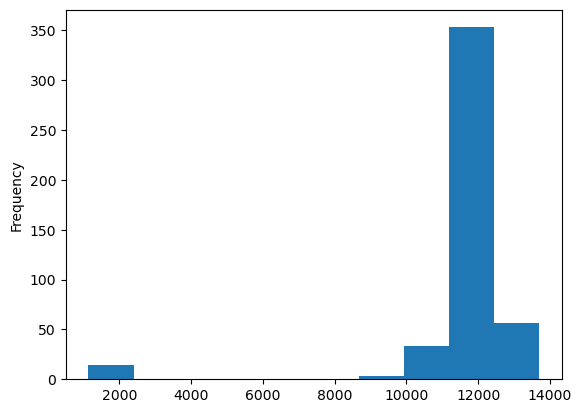

In [81]:
df['mob_screen_dimension'].plot(kind='hist')

In [83]:
df['p_cam'].unique()

array(['12MP + 2MP + 2MP', '48MP + 8MP + 2MP + 2MP',
       '48MP + 8MP + 2MP + 2MP Quad Camera', '64MP + 13MP + 8MP + 2MP',
       '16MP + 2MP', '64MP + 8MP + 2MP + 2MP Quad Camera',
       '64MP + 12MP + 8MP + 2MP', '12MP + 2MP', '64MP + 8MP + 2MP + 2MP',
       '13MP + 2MP', '64MP + 8MP + 8MP + 2MP', '48MP + 13MP + 8MP',
       '48MP + 8MP + 5MP + 2MP', '48MP + 8MP + 2MP', '48MP + 5MP',
       '12MP Rear Camera', '12MP + 5MP', '20MP + 12MP',
       '108MP Rear Camera', '13MP Rear Camera', '48MP + 8MP',
       '64MP + 8MP + 5MP + 2MP', '8MP Rear Camera', '13MP + 2MP + 8MP',
       '13MP + 8MP + 2MP', '13MP + 8MP + 2MP + 2MP', '16MP + 2MP + 8MP',
       '16MP + 8MP + 2MP', '48MP + 5MP + 8MP',
       '48 Million Quad Pixel Sensor (12 Million Effective Pixel) + 8MP + 5MP, AI Triple Rear Camera',
       '48MP + 13MP + 8MP + 2MP', '12MP + 5MP + 8MP', '16MP Rear Camera',
       '16MP + 5MP', '48MP + 8MP + 5MP', '64MP + 8MP + 5MP + 5MP',
       '48MP + 12MP + 5MP', '5MP Rear Camera',
      

In [84]:
df['p_cam_max'] = [x[0:2].replace('M','') for x in df['p_cam']]
df['p_cam_max'] = numericize(df,'p_cam_max')
df['p_cam_max'].unique()

array([12, 48, 64, 16, 13, 20, 10,  8,  5], dtype=int64)

In [85]:
df['p_cam_count'] = [x.count('MP') for x in df['p_cam']]
df['p_cam_count'].unique()

array([3, 4, 2, 1], dtype=int64)

In [86]:
df['f_cam'].unique()

array(['5MP Front Camera', '16MP Front Camera',
       '32MP + 8MP Dual Front Camera', '16MP + 8MP Dual Front Camera',
       '13MP Front Camera', '32MP Front Camera', '8MP Front Camera',
       '20MP Front Camera', '20MP + 2MP Dual Front Camera',
       '2MP Front Camera', '8MP Dual Front Camera', '25MP Front Camera',
       '24MP Front Camera', '13MP + 2MP Dual Front Camera',
       '44MP + 2MP Dual Front Camera'], dtype=object)

In [87]:
df['f_cam_max'] = [x[0:2].replace('M','') for x in df['f_cam']]
df['f_cam_max'].unique()

array(['5', '16', '32', '13', '8', '20', '2', '25', '24', '44'],
      dtype=object)

In [88]:
df['f_cam_max'] = numericize(df,'f_cam_max')
df['f_cam_max'].unique()

array([ 5, 16, 32, 13,  8, 20,  2, 25, 24, 44], dtype=int64)

In [89]:
df['f_cam_count'] = [x.count('MP') for x in df['f_cam']]
df['f_cam_count'].unique()

array([1, 2], dtype=int64)

In [90]:
df['f_cam_max'].equals(df['f_cam_ord'])

True

In [91]:
df.drop('f_cam_ord',axis=1, inplace=True)